In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/VikaAladina/Project/refs/heads/main/netflix_series_10_columns_data.csv")
df

,Series Name,Rating,Total Watches,Genre,Release Year,Average Watch Time (minutes),Total Seasons,Country of Origin,Language,Lead Actor
0,Bridgerton,1.9,17,Drama,2012,40,8,UK,English,Katherine Langford
1,13 Reasons Why,4.0,605,Fantasy,2020,65,5,South Korea,Mandarin,Jason Bateman
2,Ozark,4.0,89,Romance,2009,69,2,Germany,German,Phoebe Dynevor
3,Black Mirror,2.6,528,Documentary,2015,51,9,Spain,French,Henry Cavill
4,The Witcher,1.9,292,Romance,2013,79,3,France,Spanish,Phoebe Dynevor
...,...,...,...,...,...,...,...,...,...,...
1195,13 Reasons Why,3.3,725,Thriller,2007,54,3,Spain,German,Katherine Langford
1196,The Umbrella Academy,4.5,601,Romance,2006,38,4,Spain,Korean,Úrsula Corberó
1197,Ozark,1.6,364,Comedy,2010,53,5,USA,Mandarin,Katherine Langford
1198,13 Reasons Why,4.5,720,Sci-Fi,2003,66,3,USA,Mandarin,Wagner Moura


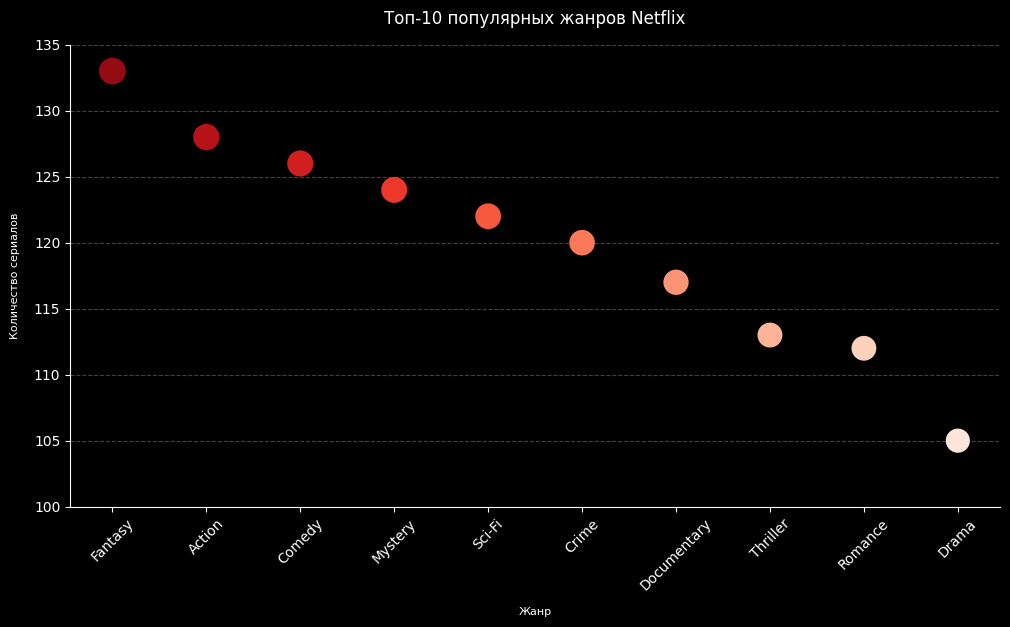

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/VikaAladina/Project/refs/heads/main/netflix_series_10_columns_data.csv")
plt.style.use('dark_background')

top_genres = df['Genre'].value_counts().head(10)
colors = sns.color_palette("Reds_r", n_colors=len(top_genres),)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(range(len(top_genres)), top_genres.values, c=colors,
           s=top_genres.values * 2.5 + 40, edgecolor="none", zorder=2)
ax.set_xticks(range(len(top_genres)))
ax.set_xticklabels(top_genres.index, rotation=45, fontsize=10, color='white')
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=10, color='white')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color('white')
ax.spines["bottom"].set_color('white')
ax.set_xlabel("Жанр", fontsize=8, color='white', labelpad=10)
ax.set_ylabel("Количество сериалов", fontsize=8, color='white', labelpad=10)
ax.set_title("Топ-10 популярных жанров Netflix", fontsize=12, color='white', pad=15)
ax.yaxis.grid(True, color='gray', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

plt.show()

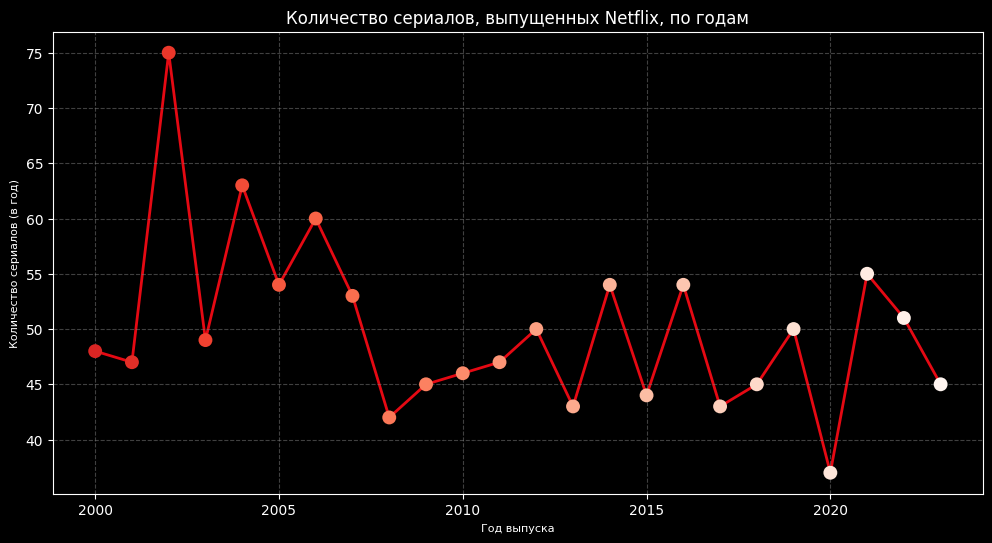

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/VikaAladina/Project/refs/heads/main/netflix_series_10_columns_data.csv")

plt.style.use('dark_background')
netflix_red = "#E50913"

year_counts = df['Release Year'].value_counts().sort_index()
years = year_counts.index
counts = year_counts.values
colors = plt.cm.Reds_r(np.linspace(0.3, 1, len(years)))

plt.figure(figsize=(12, 6))
sns.lineplot(x=years, y=counts, color=netflix_red, linewidth=2, zorder=1)
plt.scatter(years, counts, c=colors, edgecolor='none', s=100, zorder=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Год выпуска", fontsize=8, color='white')
plt.ylabel("Количество сериалов (в год)", fontsize=8, color='white')
plt.title("Количество сериалов, выпущенных Netflix, по годам", fontsize=12, color='white')
plt.grid(color='Gray', linestyle='--', alpha=0.5)

plt.show()

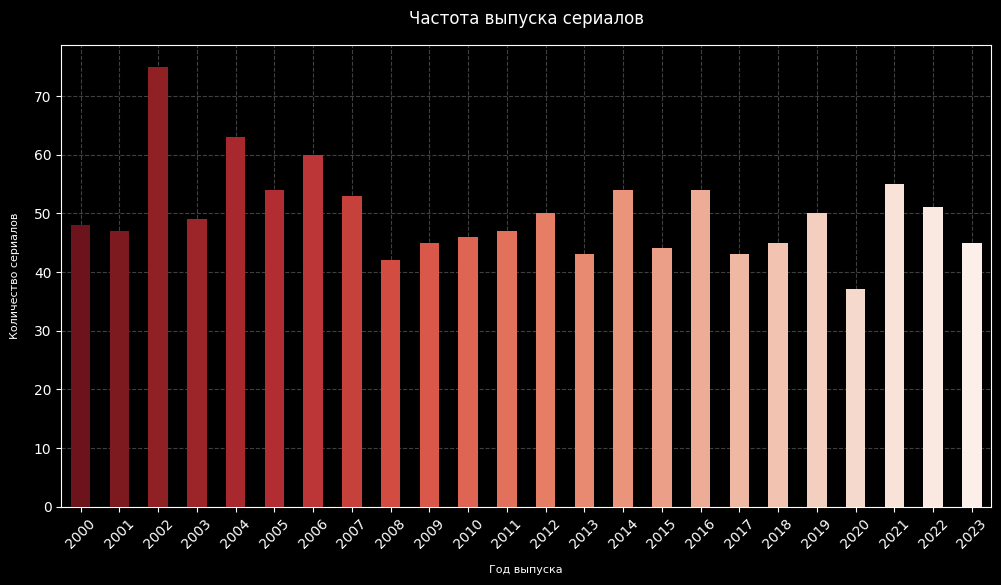

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/VikaAladina/Project/refs/heads/main/netflix_series_10_columns_data.csv")
plt.style.use('dark_background')

year_counts = df['Release Year'].value_counts().sort_index()
colors = sns.color_palette('Reds_r', n_colors=len(year_counts))

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, hue=year_counts.index, palette=colors,
            width=0.5, edgecolor='none', ax=ax, legend=False, zorder=3)

ax.set_xlabel("Год выпуска", fontsize=8, color='white', labelpad=10)
ax.set_ylabel("Количество сериалов", fontsize=8, color='white', labelpad=10)
ax.set_title("Частота выпуска сериалов", fontsize=12, color='white', pad=15)

plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
ax.grid(color='gray', linestyle='--', alpha=0.5, zorder=0)

plt.show()

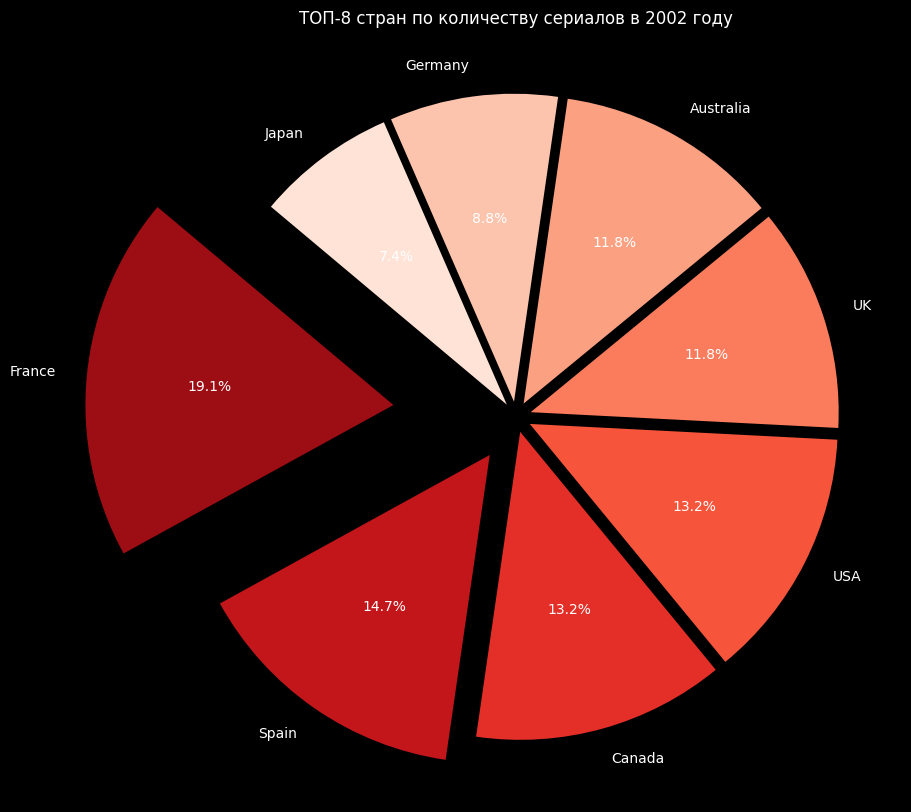

In [40]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/VikaAladina/Project/refs/heads/main/netflix_series_10_columns_data.csv")

plt.style.use('dark_background')
colors = sns.color_palette("Reds_r", n_colors=8)


# График №4

df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')
year_2002_df = df[df['Release Year'] == 2002]
year_2002_df = year_2002_df.dropna(subset=['Country of Origin'])
country_counts = year_2002_df['Country of Origin'].value_counts()
top_8_countries = country_counts.nlargest(8)

explode = (0.4, 0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
wedgeprops = {'edgecolor': 'none'}

plt.figure(figsize=(10, 10))
l_fontsize = 10
plt.pie(top_8_countries, labels=top_8_countries.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops=wedgeprops, explode=explode, textprops={'fontsize': l_fontsize})
plt.title("ТОП-8 стран по количеству сериалов в 2002 году", fontsize=12, color='white')

plt.show()

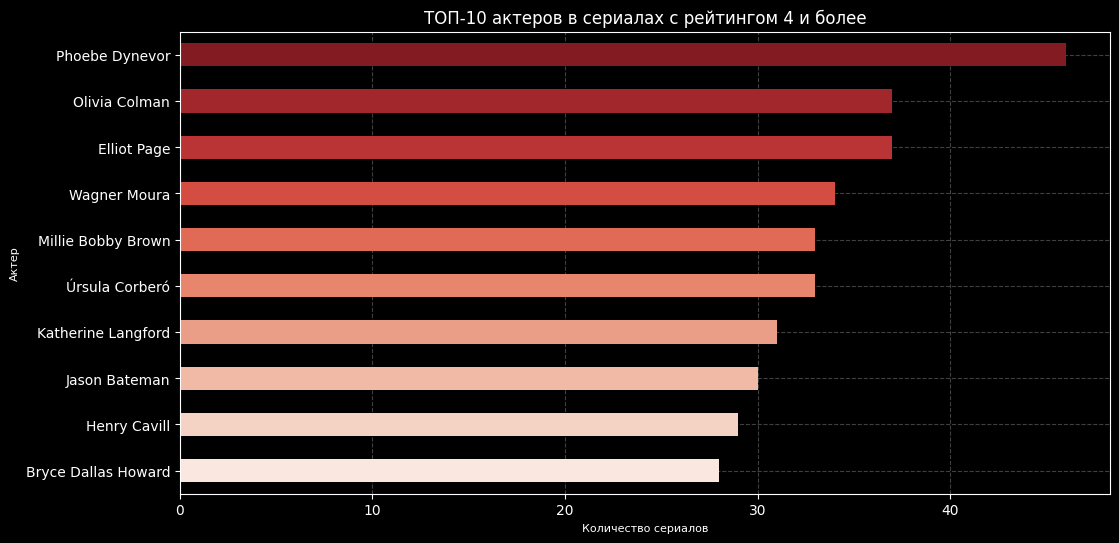

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/VikaAladina/Project/refs/heads/main/netflix_series_10_columns_data.csv")
plt.style.use('dark_background')

df_filtered = df[df['Rating'] >= 4.0]
top_actors = df_filtered['Lead Actor'].value_counts().head(10)
colors = sns.color_palette("Reds_r", n_colors=len(top_actors))

plt.figure(figsize=(12, 6))
ax=sns.barplot(x=top_actors.values, y=top_actors.index, palette=colors, width=0.5, hue=top_actors.index, legend=False, zorder=2)
for bar in ax.patches: bar.set_edgecolor('none')

plt.xlabel("Количество сериалов", fontsize=8, color='white')
plt.ylabel("Актер", fontsize=8, color='white')
plt.title("ТОП-10 актеров в сериалах с рейтингом 4 и более", fontsize=12, color='white')
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')
plt.grid(color='gray', linestyle='--', alpha=0.5, zorder=0)

plt.show()